# CNN for acoustic scene classfication: my life environment

Date: March 20, 2019

Neural network: input MFSCs to CNN

Location: Yokohama, Japan

## Preparing data set for CNN

In [7]:
DATASET_FOLDER = '../dataset/data_environment'

%run ../oscilloscope/script/dataset.py
%matplotlib inline

ds = DataSet(DATASET_FOLDER)
#ds.serialize()
train_data, train_labels, test_data, test_labels = ds.generate()['mfsc']
shape = ds.shape
class_labels = ds.class_labels
class_labels

['silence', 'train', 'station', 'fastfood', 'escalator', 'mall', 'ship']

((980, 64, 40, 1), (420, 64, 40, 1))

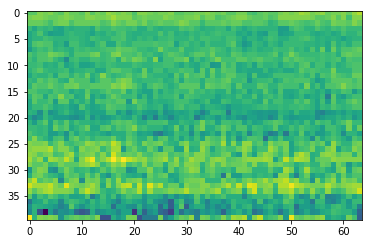

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)))
train_data.shape, test_data.shape

### CNN model

In [8]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 19, 8)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 8, 16)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 6, 32)         4640      
__________

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [12]:
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 980 samples, validate on 420 samples
Epoch 1/50
980/980 [==============================] - 35s 36ms/step - loss: 2.1436 - acc: 0.2929 - val_loss: 1.5781 - val_acc: 0.3643
Epoch 2/50
980/980 [==============================] - 32s 32ms/step - loss: 1.4697 - acc: 0.3929 - val_loss: 1.3855 - val_acc: 0.4429
Epoch 3/50
980/980 [==============================] - 31s 31ms/step - loss: 1.2745 - acc: 0.5071 - val_loss: 1.2106 - val_acc: 0.5214
Epoch 4/50
980/980 [==============================] - 31s 32ms/step - loss: 1.1050 - acc: 0.5571 - val_loss: 1.0438 - val_acc: 0.5690
Epoch 5/50
980/980 [==============================] - 31s 32ms/step - loss: 1.0211 - acc: 0.6347 - val_loss: 1.0003 - val_acc: 0.6524
Epoch 6/50
980/980 [==============================] - 31s 32ms/step - loss: 0.9574 - acc: 0.6316 - val_loss: 0.8659 - val_acc: 0.6786
Epoch 7/50
980/980 [==============================] - 31s 32ms/step - loss: 0.8873 - acc: 0.6786 - val_loss: 0.7967 - val_acc: 0.7024
Epoch 8/50
980/9

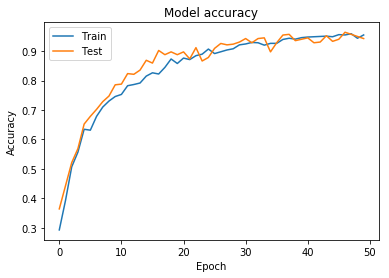

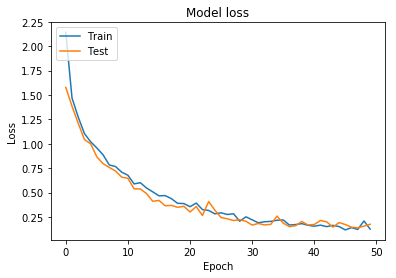

In [13]:
plot_accuracy(history)
plot_loss(history)

## Save the model

In [14]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/my_life_environment_cnn_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [15]:
del model
model = models.load_model(filename)

## Confirmation

In [16]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)

In [17]:
class_labels

['silence', 'train', 'station', 'fastfood', 'escalator', 'mall', 'ship']

In [18]:
(activations[-1][:10]*100).astype(int)

array([[ 99,   0,   0,   0,   0,   0,   0],
       [ 99,   0,   0,   0,   0,   0,   0],
       [  0,   0,  99,   0,   0,   0,   0],
       [  0,   0,  99,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 100],
       [ 99,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  99,   0,   0,   0],
       [  0,  67,   0,   0,   0,  32,   0],
       [ 99,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  99,   0,   0]])

In [19]:
test_labels[:10].astype(int)

array([[1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0]])

'mall'

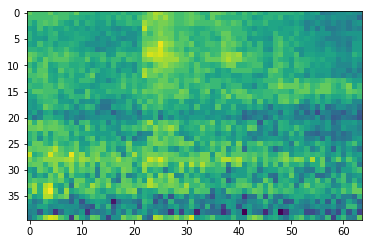

In [27]:
image_number = 50

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
class_labels[np.argmax(test_labels[image_number])]

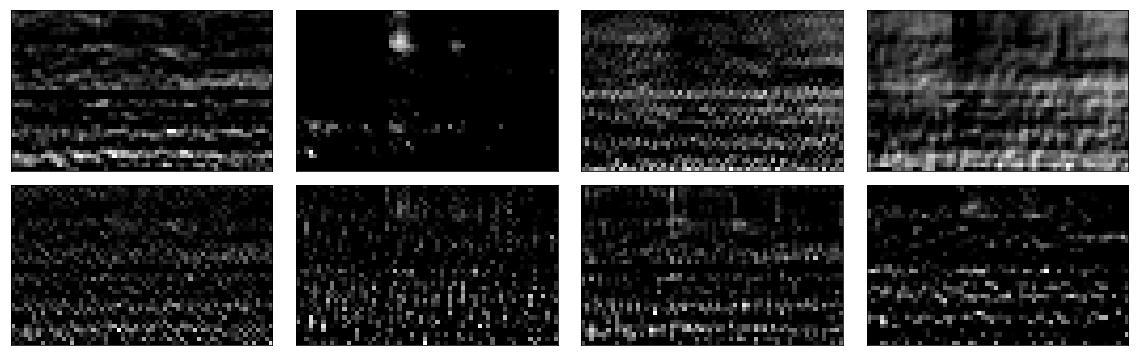

In [28]:
plot_layer(activations, image_number, 0, 4)

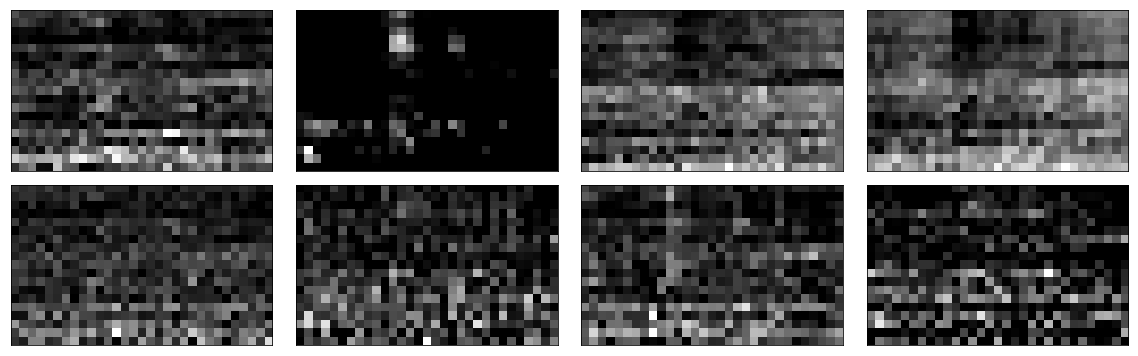

In [29]:
plot_layer(activations, image_number, 1, 4)

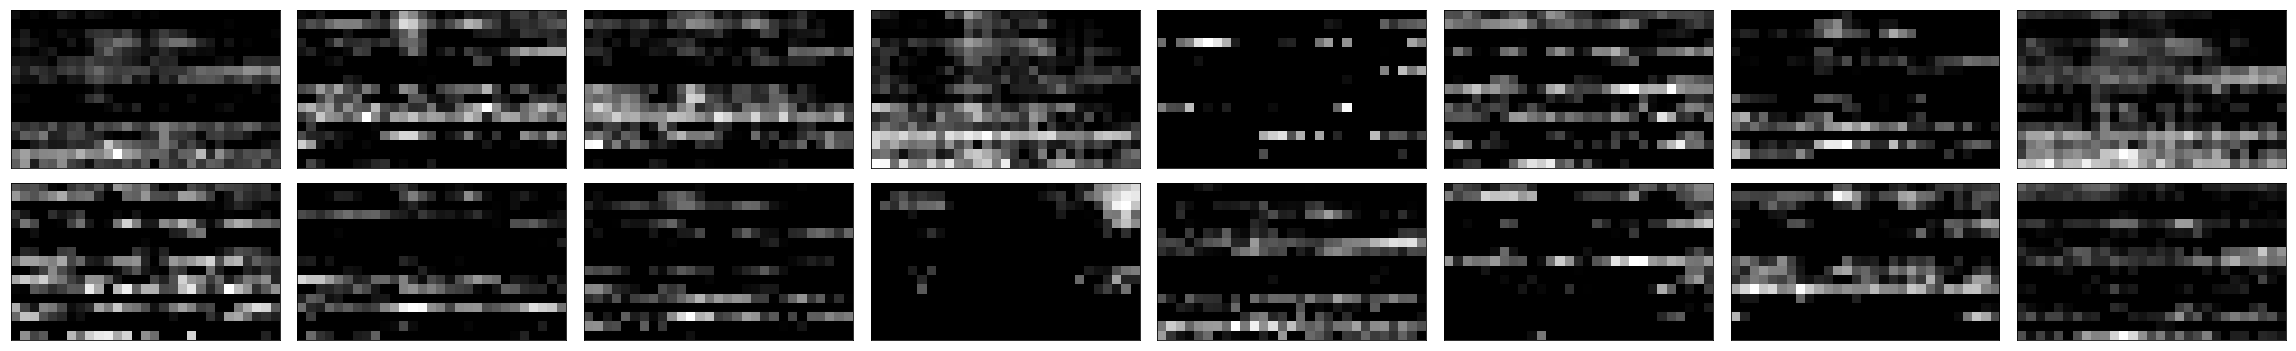

In [30]:
plot_layer(activations, image_number, 3, 8)

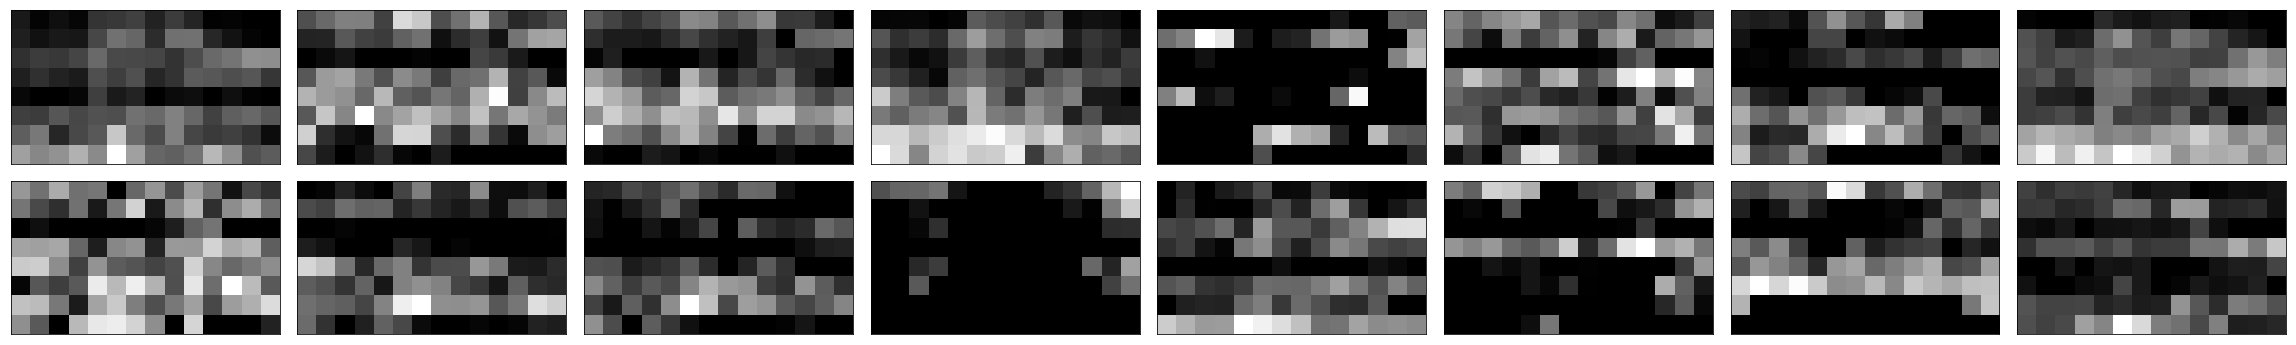

In [31]:
plot_layer(activations, image_number, 4, 8)

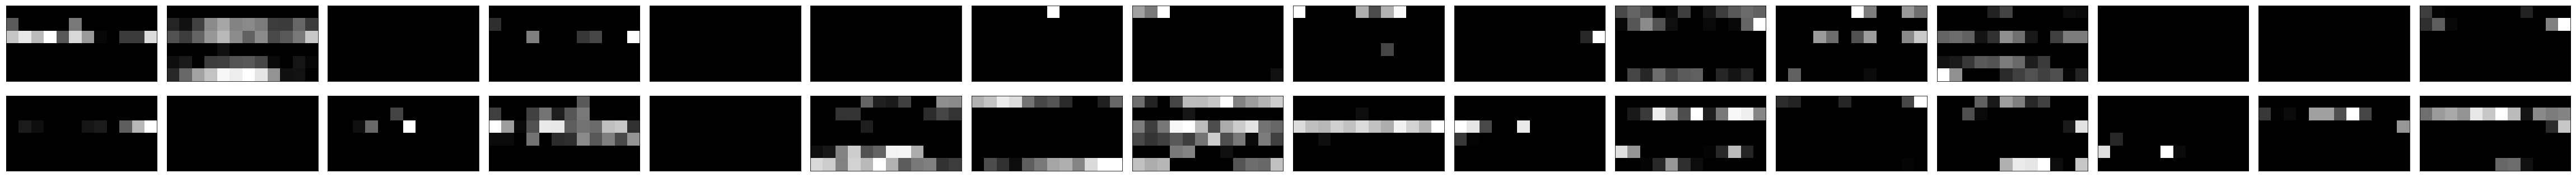

In [32]:
plot_layer(activations, image_number, 6, 16)

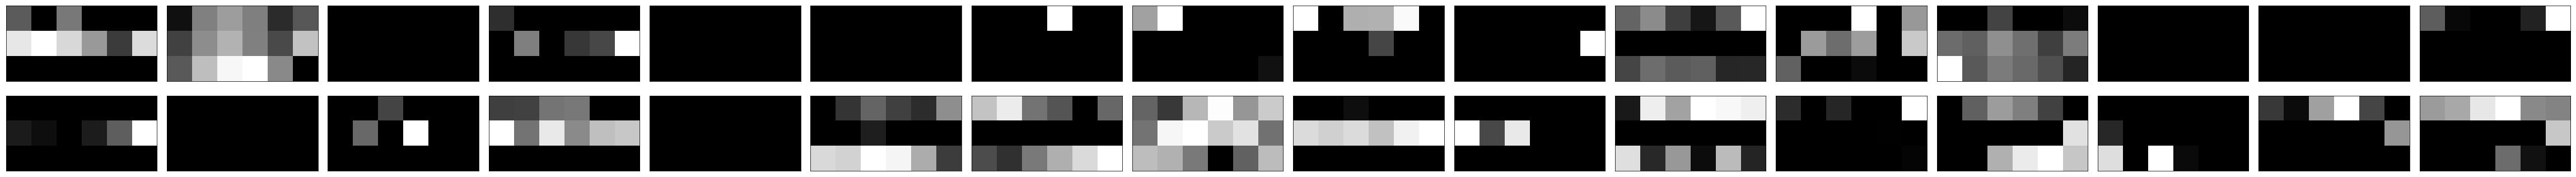

In [33]:
plot_layer(activations, image_number, 7, 16)